#tesnorflow install

In [ ]:
#!pip install tensorflow
import tensorflow as tf
tf.__version__

'2.15.0'

#import libraries

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.applications import VGG16
import matplotlib.pyplot as plt
import numpy as np

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#define size and epoch

In [16]:
IMAGE_SIZE = 224
BATCH_SIZE = 64
CHANNELS = 3
EPOCHS = 30

#import dataset

In [4]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/Colab Notebooks/rice_img',
    shuffle=True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 4347 files belonging to 3 classes.


#get classnames and images per batch

In [5]:
class_names=dataset.class_names
class_names

['Bacterialblight', 'Blast', 'Tungro']

In [ ]:
len(dataset)


68

#plot figures

(64, 224, 224, 3)
[2 0 1 0 1 2 1 1 1 0 1 2 2 2 0 0 0 1 1 2 1 0 0 1 1 2 1 0 0 2 0 1 0 1 1 0 0
 0 2 0 2 0 1 1 2 2 2 2 0 0 0 0 0 1 2 1 0 0 1 1 1 1 2 0]


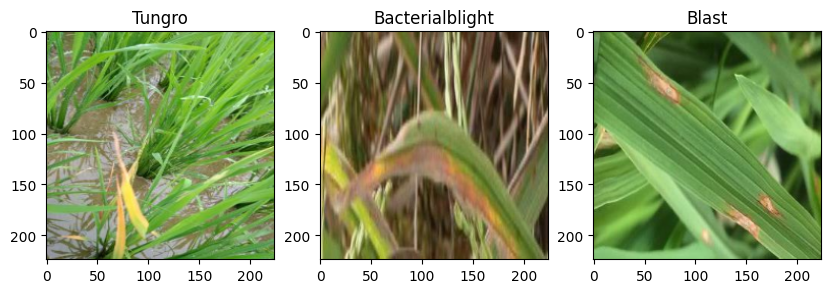

In [ ]:
plt.figure(figsize=(10,10))
for image_batch,label_batch in dataset.take(1):

    #show batch size,image size,rgb channel
    print(image_batch.shape)

    #show classes
    print(label_batch.numpy())

    #show image of the first data
    for i in range(3):
        ax=plt.subplot(1,3,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])

#dataset split

In [6]:
def dataset_split_tf(ds,train_split=0.7,val_split=0.15,test_split=0.15,shuffle=True,shuffle_size=10000):

    ds_size=len(ds)

    if shuffle:
        ds=ds.shuffle(shuffle_size,seed=12)

    train_size=int(train_split*ds_size)
    val_size=int(val_split*ds_size)

    train_ds=ds.take(train_size)

    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)

    return train_ds,val_ds,test_ds

train_ds,val_ds,test_ds =dataset_split_tf(dataset)

#Shuffle dataset

In [7]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [8]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

#import vgg16

In [9]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(IMAGE_SIZE, IMAGE_SIZE, CHANNELS))

58889256/58889256 [==============================] - 0s 0us/step


In [10]:
base_model.trainable = False

#model train

In [11]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = len(class_names)

model = models.Sequential([
    resize_and_rescale,
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(512, activation='relu'),  # Additional dense layer
    layers.Dropout(0.5),
    layers.Dense(256, activation='relu'),  # Additional dense layer
    layers.Dropout(0.4),  # Additional dropout layer
    layers.Dense(128, activation='relu'),  # Additional dense layer
    layers.Dropout(0.3),  # Additional dropout layer
    layers.Flatten(),
    layers.Dense(64, activation='relu'),  # Additional dense layer
    layers.Dropout(0.2),  # Additional dropout layer
    layers.Dense(n_classes, activation='softmax')
])


model.build(input_shape=(None,) + input_shape)

#model summary

In [ ]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d (  (None, 512)               0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 512)               262656    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                      

#compile model

In [12]:
model.compile(
    optimizer='rmsprop',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

#train model

In [17]:
history=model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/30
47/47 [==============================] - 13s 284ms/step - loss: 0.1229 - accuracy: 0.9608 - val_loss: 0.0294 - val_accuracy: 0.9906
Epoch 2/30
47/47 [==============================] - 14s 289ms/step - loss: 0.0987 - accuracy: 0.9651 - val_loss: 0.0305 - val_accuracy: 0.9906
Epoch 3/30
47/47 [==============================] - 14s 294ms/step - loss: 0.0881 - accuracy: 0.9664 - val_loss: 0.0204 - val_accuracy: 0.9953
Epoch 4/30
47/47 [==============================] - 14s 296ms/step - loss: 0.0895 - accuracy: 0.9678 - val_loss: 0.0207 - val_accuracy: 0.9953
Epoch 5/30
47/47 [==============================] - 14s 296ms/step - loss: 0.0677 - accuracy: 0.9771 - val_loss: 0.3769 - val_accuracy: 0.8781
Epoch 6/30
47/47 [==============================] - 14s 298ms/step - loss: 0.0766 - accuracy: 0.9734 - val_loss: 0.0749 - val_accuracy: 0.9656
Epoch 7/30
47/47 [==============================] - 14s 297ms/step - loss: 0.0782 - accuracy: 0.9717 - val_loss: 0.0176 - val_accuracy: 0.9953

#get accuracy

In [18]:
scores=model.evaluate(test_ds)#first parameter is loss, 2nd parameter is accuracy
print("Test Loss:", scores[0])
print("Test Accuracy:", scores[1])

11/11 [==============================] - 3s 256ms/step - loss: 0.0036 - accuracy: 0.9986
Test Loss: 0.0036007515154778957
Test Accuracy: 0.9985795617103577


In [19]:
from sklearn.metrics import precision_score, recall_score, f1_score
y_true = []
y_pred = []
for images, labels in test_ds:
    y_true.extend(labels.numpy())
    predictions = model.predict(images)
    y_pred.extend(np.argmax(predictions, axis=1))

precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

2/2 [==============================] - 0s 120ms/step
Precision: 0.9985859728506786
Recall: 0.9985795454545454
F1 Score: 0.9985797035397167


#parameters

In [21]:
history.params
history.history.keys()
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

#plot training accuracy and loss

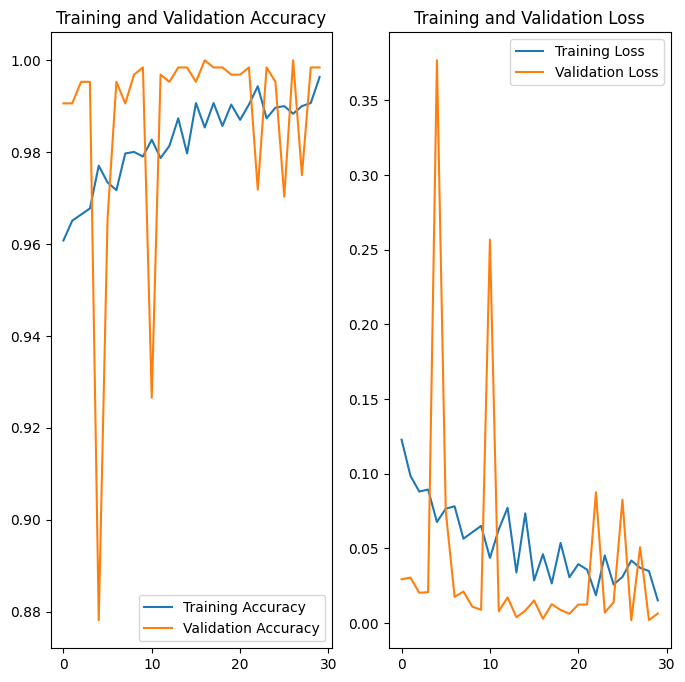

In [22]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label='Training Accuracy')
plt.plot(range(EPOCHS),val_acc,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')


plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss,label='Training Loss')
plt.plot(range(EPOCHS),val_loss,label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#prediction

First image to predict
First image's actual label: Bacterialblight
2/2 [==============================] - 0s 113ms/step
Predicted Label: Bacterialblight


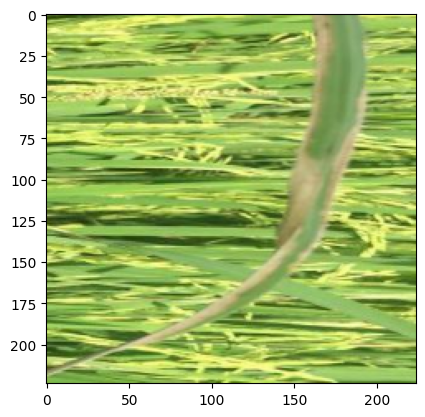

In [ ]:
import numpy as np
for images_batch, label_batch in test_ds.take(1):

    first_image=images_batch[0].numpy().astype('uint8')
    first_label=label_batch[0]

    print("First image to predict")
    plt.imshow(first_image)
    print("First image's actual label:",class_names [first_label])
    batch_prediction=model.predict(images_batch)
    print("Predicted Label:",class_names[np.argmax(batch_prediction[0])] )#will show three nueron n_classes parameters


#prediction function

In [ ]:
def prediction(model,img):
    img_array= tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    #create a batch
    img_array=tf.expand_dims(img_array,0)
    predictions=model.predict(img_array)
    predicted_class=class_names[np.argmax(predictions[0])]
    confidence=round(100*(np.max(predictions[0])),2)
    return predicted_class,confidence

#plot actual and prediction

1/1 [==============================] - 0s 26ms/step


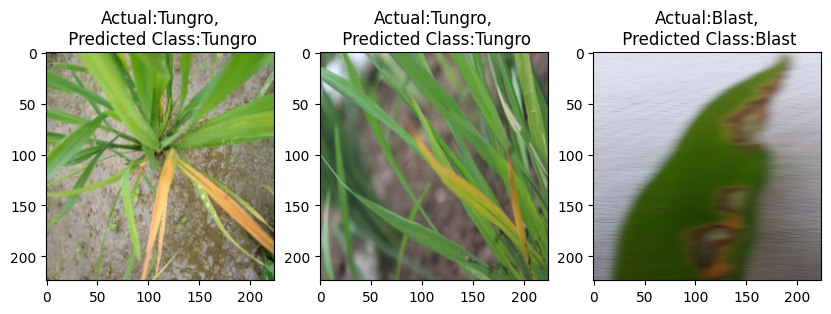

In [ ]:
plt.figure(figsize=(10,10))
for images,labels in test_ds.take(1):
    for i in range(3):
        ax=plt.subplot(1,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predicted_class,confidence=prediction(model,images[i].numpy())
        actual_class=class_names[labels[i]]
        plt.title(f"Actual:{actual_class},\n Predicted Class:{predicted_class}")
